In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import numpy as np
import scipy.stats as ss
import os as os
import math
from collections import Counter
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

df = pd.read_csv('/content/drive/MyDrive/Datasets-Veltris/EDA_Crash_Reporting_Incidents_Data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('NonTraffic', axis=1, inplace=True)

<ipython-input-1-37b3a3196eda>:15: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Datasets-Veltris/EDA_Crash_Reporting_Incidents_Data.csv')


In [2]:
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,Lane Number,Lane Type,Number of Lanes,Direction,Distance,Distance Unit,Road Grade,Cross-Street Type,Municipality,Related Non-Motorist,At Fault,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,First Harmful Event,Second Harmful Event,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location,Day,Year,Month
0,MCP11520005,15000008,Montgomery County Police,Property Damage Crash,2015-01-01 00:30:00,Yes,Maryland (State),4.38,North,North,1.0,UNKNOWN,3.0,North,0.0,FEET,LEVEL,County,UNKNOWN,NONE,DRIVER,SAME DIR REAR END,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,ALCOHOL,NONE,OTHER VEHICLE,NONE,NONE,INTERSECTION RELATED,FOUR-WAY INTERSECTION,INTERSECTION RELATED,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.022001,-77.102673,"(39.02200107, -77.10267305)",Thursday,2015,1
1,MCP2686000D,15000017,Montgomery County Police,Property Damage Crash,2015-01-01 01:10:00,No,Ramp,0.15,South,South,0.0,ON RAMP,1.0,South,10.0,FEET,HILL UPHILL,County,UNKNOWN,NONE,DRIVER,SAME DIR REAR END,UNKNOWN,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,ALCOHOL,NONE,OTHER VEHICLE,OTHER VEHICLE,NONE,INTERCHANGE RELATED,T-INTERSECTION,ON RAMP EXIT AREA,CURVE LEFT,NO DEFECTS,ONE-WAY TRAFFICWAY,39.196610,-77.265547,"(39.19661, -77.26554667)",Thursday,2015,1
2,MCP2783000G,15000025,Montgomery County Police,Injury Crash,2015-01-01 01:14:00,No,Maryland (State),25.21,East,East,2.0,UNKNOWN,3.0,East,0.0,FEET,LEVEL,County,UNKNOWN,NONE,DRIVER,HEAD ON,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,ALCOHOL,NONE,OTHER VEHICLE,OTHER VEHICLE,NONE,INTERSECTION,FOUR-WAY INTERSECTION,UNKNOWN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.096217,-77.109803,"(39.09621667, -77.10980333)",Thursday,2015,1
3,MCP2674000D,15000016,Montgomery County Police,Property Damage Crash,2015-01-01 01:26:00,No,County,0.76,North,West,0.0,LEFT TURN LANE,2.0,North,0.0,FEET,HILL UPHILL,Maryland (State),UNKNOWN,NONE,DRIVER,OPPOSITE DIR BOTH LEFT TURN,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,OTHER,NONE,OTHER VEHICLE,NONE,NONE,INTERSECTION,FOUR-WAY INTERSECTION,INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.158059,-77.204349,"(39.158059, -77.204349)",Thursday,2015,1
4,MCP23000002,15000197,Montgomery County Police,Property Damage Crash,2015-01-01 02:00:00,No,County,1.81,North,North,1.0,UNKNOWN,1.0,North,10.0,FEET,LEVEL,County,UNKNOWN,NONE,UNKNOWN,SINGLE VEHICLE,CLEAR,DRY,DARK NO LIGHTS,UNKNOWN,OTHER,NONE,OTHER,NONE,NONE,NON INTERSECTION,NONE,NONE,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.148678,-77.093848,"(39.148678, -77.093848)",Thursday,2015,1


### Converting all categorical features into numerical using Label Encoder

In [3]:
cols = list(df.columns)
cols.remove('Crash Date/Time')
cols.remove('Mile Point')
cols.remove('Lane Number')
cols.remove('Number of Lanes')
cols.remove('Distance')
cols.remove('Latitude')
cols.remove('Longitude')
cols.remove('Location')
cols.remove('Month')
cols.remove('Year')
label_encoder = LabelEncoder()
df_pre = df.copy()
df_pre['Month'] = df_pre['Month'].astype('int64')
df_pre['Year'] = df_pre['Year'].astype('int64')
cat_label_mapping = {}
for col in cols[2:]:
    df_pre[col] = label_encoder.fit_transform(df_pre[col])
    cat_label_mapping[col] =[(i,j) for i,j in enumerate(label_encoder.classes_)]
df_pre.drop(['Report Number','Local Case Number','Crash Date/Time','Location'], axis=1, inplace=True)
df_pre.head()

,Agency Name,ACRS Report Type,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,Lane Number,Lane Type,Number of Lanes,Direction,Distance,Distance Unit,Road Grade,Cross-Street Type,Municipality,Related Non-Motorist,At Fault,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,First Harmful Event,Second Harmful Event,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Day,Year,Month
0,3,2,1,3,4.38,1,1,1.0,13,3.0,1,0.0,0,4,0,19,5,1,9,2,0,1,7,0,10,15,9,18,5,1,1,3,3,2,39.022001,-77.102673,4,2015,1
1,3,2,0,6,0.15,2,2,0.0,7,1.0,2,10.0,0,3,0,19,5,1,9,10,0,1,7,0,10,15,16,18,3,5,4,0,3,0,39.196610,-77.265547,4,2015,1
2,3,1,0,3,25.21,0,0,2.0,13,3.0,0,0.0,0,4,0,19,5,1,3,2,0,1,7,0,10,15,16,18,4,1,8,3,3,2,39.096217,-77.109803,4,2015,1
3,3,2,0,0,0.76,1,4,0.0,4,2.0,1,0.0,0,3,3,19,5,1,5,2,0,1,7,6,10,15,9,18,4,1,0,3,3,2,39.158059,-77.204349,4,2015,1
4,3,2,0,0,1.81,1,1,1.0,13,1.0,1,10.0,0,4,0,19,5,3,15,2,0,2,8,6,10,10,9,18,6,2,2,3,3,4,39.148678,-77.093848,4,2015,1


# Problem 1: Predicting the severity of collisions

* Target Variable: **ACRS Report Type**
* Input features: **Weather, Road Condition, At Fault, Driver Substance Abuse, Road Alignment, Surface Condition, Non-Motorist Substance Abuse, Light and Collision Type**

In [ ]:
df_pre.columns

Index(['Agency Name', 'ACRS Report Type', 'Hit/Run', 'Route Type',
       'Mile Point', 'Mile Point Direction', 'Lane Direction', 'Lane Number',
       'Lane Type', 'Number of Lanes', 'Direction', 'Distance',
       'Distance Unit', 'Road Grade', 'Cross-Street Type', 'Municipality',
       'Related Non-Motorist', 'At Fault', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'First Harmful Event', 'Second Harmful Event', 'Fixed Oject Struck',
       'Junction', 'Intersection Type', 'Intersection Area', 'Road Alignment',
       'Road Condition', 'Road Division', 'Day', 'Year', 'Month'],
      dtype='object')

In [ ]:
len(df_pre.columns)

37

## Using RFE to select features:

In [4]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

X,y = df_pre.drop(['ACRS Report Type'],axis=1), df_pre['ACRS Report Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [5]:
rfe_dt = RFE(estimator=DecisionTreeClassifier(random_state=100), n_features_to_select=10)
rfe_dt.fit(X_train, y_train)
rc = rfe_dt.support_
retained_columns = []
for i in range(len(rc)):
    if rc[i]:
        retained_columns.append(X_train.columns[i])
retained_columns

['Mile Point',
 'Lane Direction',
 'Distance',
 'Collision Type',
 'Non-Motorist Substance Abuse',
 'Latitude',
 'Longitude',
 'Day',
 'Year',
 'Month']

In [7]:
rfe_dt.score(X_test, y_test)

0.5875111591410985

In [ ]:
rfe_rf = RFE(estimator=RandomForestClassifier(random_state=100),n_features_to_select=10)
rfe_rf.fit(X_train, y_train)
rc = rfe_rf.support_
retained_columns_rf = []
for i in range(len(rc)):
    if rc[i]:
        retained_columns_rf.append(X_train.columns[i])
retained_columns_rf

['Mile Point',
 'Lane Direction',
 'Number of Lanes',
 'Distance',
 'Cross-Street Type',
 'Collision Type',
 'First Harmful Event',
 'Day',
 'Year',
 'Month']

In [ ]:
log_reg = LogisticRegression(random_state=100, n_jobs=-1)

log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.6550973420834182
Test Accuracy: 0.6522576704411972


## Model Building:

In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pickle

In [10]:
X,y = df_pre.drop(['ACRS Report Type'],axis=1), df_pre['ACRS Report Type']
X = X[['Weather', 'Road Condition', 'At Fault', 'Driver Substance Abuse', 'Road Alignment', 'Surface Condition', 'Non-Motorist Substance Abuse', 'Light', 'Collision Type','Mile Point','Lane Direction','Lane Number','Distance','Cross-Street Type','Day','Month']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=100)

### Logistic Regression:

In [11]:
log_reg = LogisticRegression(random_state=100, n_jobs=-1)

log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [12]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.629082024214137
Test Accuracy: 0.6281539256683738


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.45      0.01      0.02      7823
           2       0.63      0.99      0.77     13387

    accuracy                           0.63     21283
   macro avg       0.36      0.33      0.26     21283
weighted avg       0.56      0.63      0.49     21283



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# save
with open('/content/drive/MyDrive/Models-Veltris/p1/lr.pkl','wb') as f:
  pickle.dump(log_reg, f)

In [ ]:
# with open('/content/drive/MyDrive/Models-Veltris/p1/lr.pkl', 'rb') as f:
#   log_reg = pickle.load(f)

# y_train_pred = log_reg.predict(X_train)
# y_test_pred = log_reg.predict(X_test)

# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print("Train Accuracy:", train_accuracy)
# print("Test Accuracy:", test_accuracy)

### Decision Trees:

In [14]:
dt_clf = DecisionTreeClassifier(min_samples_split=20, random_state=100)

# more I increase the min_samples_split, the more the test acc increases, but train acc decreases.

dt_clf.fit(X_train, y_train)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

In [15]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.815621720675991
Test Accuracy: 0.6098294413381572


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.14      0.07      0.09        73
           1       0.47      0.47      0.47      7823
           2       0.69      0.69      0.69     13387

    accuracy                           0.61     21283
   macro avg       0.43      0.41      0.42     21283
weighted avg       0.61      0.61      0.61     21283



In [ ]:
# save
with open('/content/drive/MyDrive/Models-Veltris/p1/dt.pkl','wb') as f:
  pickle.dump(dt_clf, f)

In [ ]:
# with open('/content/drive/MyDrive/Models-Veltris/p1/dt.pkl', 'rb') as f:
#   dt_clf = pickle.load(f)

# y_train_pred = dt_clf.predict(X_train)
# y_test_pred = dt_clf.predict(X_test)

# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print("Train Accuracy:", train_accuracy)
# print("Test Accuracy:", test_accuracy)

### Random Forest:

In [17]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=True , max_features = 'log2', random_state=100, n_jobs=-1)

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

In [18]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9996397638103591
Test Accuracy: 0.660809096461965


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        73
           1       0.57      0.35      0.43      7823
           2       0.69      0.85      0.76     13387

    accuracy                           0.66     21283
   macro avg       0.75      0.40      0.41     21283
weighted avg       0.64      0.66      0.64     21283



In [ ]:
# save
with open('/content/drive/MyDrive/Models-Veltris/p1/rf.pkl','wb') as f:
  pickle.dump(rf_clf, f)

In [ ]:
# with open('/content/drive/MyDrive/Models-Veltris/p1/rf.pkl', 'rb') as f:
#   log_reg = pickle.load(f)

# y_train_pred = rf_clf.predict(X_train)
# y_test_pred = rf_clf.predict(X_test)

# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print("Train Accuracy:", train_accuracy)
# print("Test Accuracy:", test_accuracy)

### XGBoost:

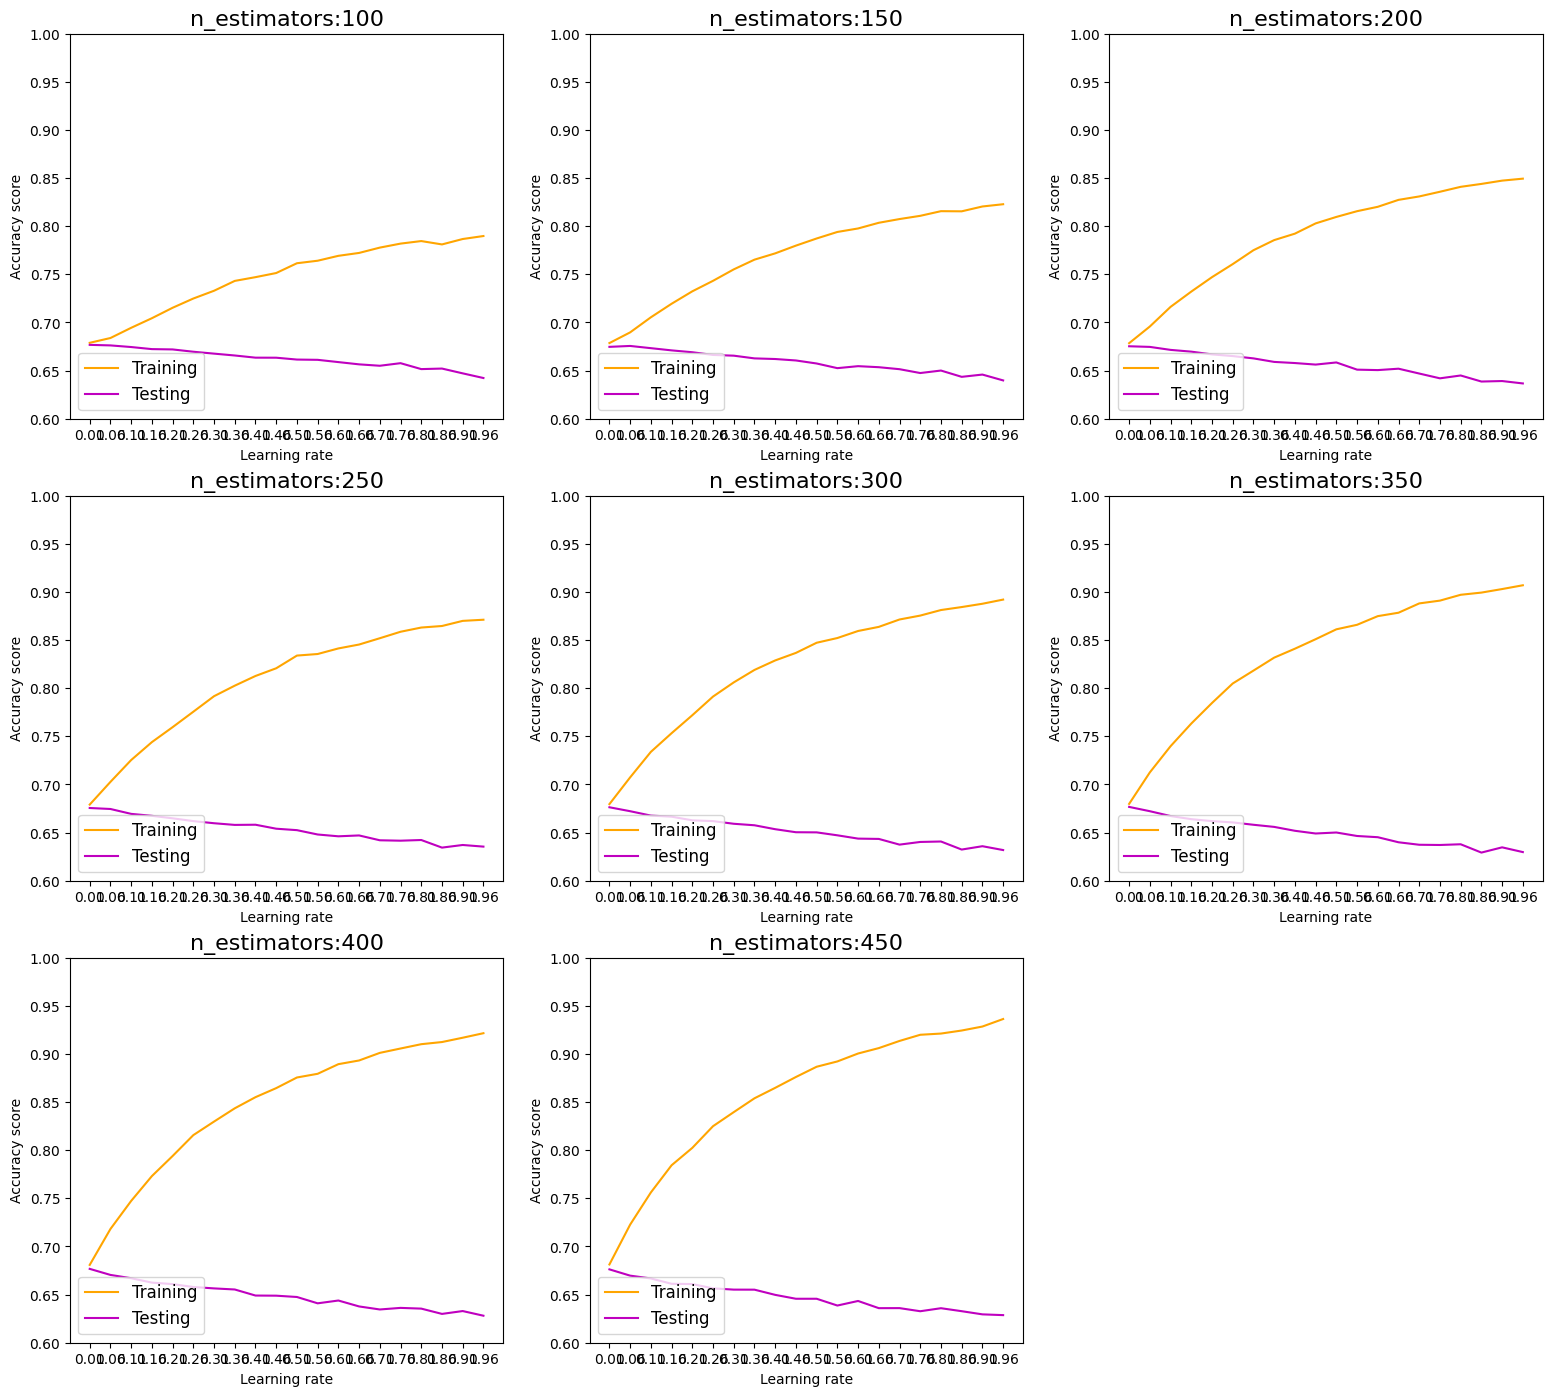

In [ ]:
learning_rate_range = np.arange(0.01, 1, 0.05)
estimators_range = np.arange(100,500,50)
fig = plt.figure(figsize=(19, 17))
idx = 1
for n in estimators_range:
  test_XG = []
  train_XG = []
  for lr in learning_rate_range:
    xgb_classifier = XGBClassifier(objective = 'multi:softprob', n_estimators=n, eta = lr, n_jobs=-1, random_state=100)
    xgb_classifier.fit(X_train, y_train)
    train_XG.append(xgb_classifier.score(X_train, y_train))
    test_XG.append(xgb_classifier.score(X_test, y_test))
  fig.add_subplot(3, 3, idx)
  idx += 1
  plt.plot(learning_rate_range, train_XG, c='orange', label='Training')
  plt.plot(learning_rate_range, test_XG, c='m', label='Testing')
  plt.xlabel('Learning rate')
  plt.xticks(learning_rate_range)
  plt.ylabel('Accuracy score')
  plt.ylim(0.6, 1)
  plt.legend(prop={'size': 12}, loc=3)
  title = "n_estimators:" + str(n)
  plt.title(title, size=16)
plt.show()

**0.96 lr --> ~80% train and 64% test acc**

In [ ]:
xgb = XGBClassifier(n_estimators = 450, eta = 0.96, n_jobs=-1, random_state=100, enable_categorical=True)

# Train the model
xgb.fit(X_train, y_train)

# Predict on training and test set
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.936316506648707
Test Accuracy: 0.6286707700982005


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.27      0.05      0.09        73
           1       0.50      0.44      0.46      7823
           2       0.69      0.74      0.72     13387

    accuracy                           0.63     21283
   macro avg       0.49      0.41      0.42     21283
weighted avg       0.62      0.63      0.62     21283



In [ ]:
with open('/content/drive/MyDrive/Models-Veltris/p1/xgb.pkl','wb') as f:
  pickle.dump(xgb, f)

# Problem 2: Hit and Run Prediction: Predicting a vehicle involved in collision will flee or not

* Target Variable: **Hit/Run**
* Input features: **Location, Traffic Control, Weather, Road Condition, At Fault, Driver Substance Abuse, Road Alignment, Surface Condition, Non-Motorist Substance Abuse, Light and Collision Type**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
X,y = df_pre.drop(['Hit/Run'],axis=1), df_pre['Hit/Run']
X = X[['Latitude', 'Longitude','Traffic Control', 'Weather', 'Road Condition', 'At Fault','Driver Substance Abuse', 'Road Alignment', 'Surface Condition', 'Non-Motorist Substance Abuse', 'Light', 'Collision Type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=100)

## Model Building:

### Logistic Regression:

In [ ]:
log_reg = LogisticRegression(random_state=100, n_jobs=-1)

log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8480116528576127
Test Accuracy: 0.8480007517737161


In [ ]:
with open('/content/drive/MyDrive/Models-Veltris/p2/lr.pkl','wb') as f:
  pickle.dump(log_reg, f)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     18048
           1       0.00      0.00      0.00      3235

    accuracy                           0.85     21283
   macro avg       0.42      0.50      0.46     21283
weighted avg       0.72      0.85      0.78     21283



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Trees:

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=100)


dt_clf.fit(X_train, y_train)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.8199501949913076


In [ ]:
with open('/content/drive/MyDrive/Models-Veltris/p2/dt.pkl','wb') as f:
  pickle.dump(dt_clf, f)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     18048
           1       0.41      0.41      0.41      3235

    accuracy                           0.82     21283
   macro avg       0.65      0.65      0.65     21283
weighted avg       0.82      0.82      0.82     21283



### Random Forest:

In [ ]:
rf_clf = RandomForestClassifier(random_state=100, n_jobs=-1)

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9998747004557771
Test Accuracy: 0.8628952685241742


In [ ]:
with open('/content/drive/MyDrive/Models-Veltris/p2/rf.pkl','wb') as f:
  pickle.dump(rf_clf, f)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     18048
           1       0.57      0.38      0.46      3235

    accuracy                           0.86     21283
   macro avg       0.73      0.66      0.69     21283
weighted avg       0.85      0.86      0.85     21283



### XGBoost:

In [ ]:
xgb = XGBClassifier(random_state=100, n_jobs=-1)

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9005121618870111
Test Accuracy: 0.8746887186956726


In [ ]:
with open('/content/drive/MyDrive/Models-Veltris/p2/xgb.pkl','wb') as f:
  pickle.dump(xgb, f)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     18048
           1       0.63      0.41      0.50      3235

    accuracy                           0.87     21283
   macro avg       0.77      0.69      0.71     21283
weighted avg       0.86      0.87      0.86     21283



# Problem 3: Predicting parties at Fault: Determining which parties are at fault in a collision.

* Target Variable: **At Fault**
* Input features: **Location, Traffic Control, Weather, Road Condition, At Fault, Driver Substance Abuse, Road Alignment, Surface Condition, Non-Motorist Substance Abuse, Light and Collision Type**

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pickle

In [5]:
df_pre['At Fault'].value_counts()

At Fault
1    79282
3     4565
2     1150
0      133
Name: count, dtype: int64

In [9]:
X,y = df_pre.drop(['At Fault'],axis=1), df_pre['At Fault']
X = X[['Latitude', 'Longitude', 'Traffic Control', 'Weather', 'Road Condition', 'Driver Substance Abuse', 'Road Alignment', 'Surface Condition', 'Non-Motorist Substance Abuse', 'Light', 'Collision Type']]

## Using Imabalanced Data:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100)

### Logistic Regression:

In [11]:
log_reg = LogisticRegression(random_state=100, n_jobs=-1)

log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9313358497658465
Test Accuracy: 0.9312127049758023


In [15]:
with open('/content/drive/MyDrive/Models-Veltris/p3/lr_unb.pkl','wb') as f:
  pickle.dump(log_reg, f)

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.93      1.00      0.96     19819
           2       0.00      0.00      0.00       311
           3       0.00      0.00      0.00      1112

    accuracy                           0.93     21283
   macro avg       0.23      0.25      0.24     21283
weighted avg       0.87      0.93      0.90     21283



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**We can see that it predicted everything as class 1 so we got 93% acc. But it is totally wrong!**

### Decision Trees:

In [16]:
dt_clf = DecisionTreeClassifier(random_state=100)


dt_clf.fit(X_train, y_train)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9999530126709164
Test Accuracy: 0.8869050415824836


In [17]:
with open('/content/drive/MyDrive/Models-Veltris/p3/dt_unb.pkl','wb') as f:
  pickle.dump(dt_clf, f)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.09      0.07      0.08        41
           1       0.94      0.94      0.94     19819
           2       0.36      0.37      0.36       311
           3       0.12      0.13      0.12      1112

    accuracy                           0.89     21283
   macro avg       0.38      0.38      0.38     21283
weighted avg       0.89      0.89      0.89     21283



### Random Forest:

In [19]:
rf_clf = RandomForestClassifier(random_state=100, n_jobs=-1)

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9998433755697214
Test Accuracy: 0.928816426255697


In [20]:
with open('/content/drive/MyDrive/Models-Veltris/p3/rf_unb.pkl','wb') as f:
  pickle.dump(rf_clf, f)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.94      0.99      0.96     19819
           2       0.45      0.29      0.35       311
           3       0.27      0.04      0.07      1112

    accuracy                           0.93     21283
   macro avg       0.41      0.33      0.35     21283
weighted avg       0.89      0.93      0.91     21283



### XGBoost:

In [22]:
xgb = XGBClassifier(random_state=100, n_jobs=-1)

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9465127570598462
Test Accuracy: 0.9312127049758023


In [23]:
with open('/content/drive/MyDrive/Models-Veltris/p3/xgb_unb.pkl','wb') as f:
  pickle.dump(xgb, f)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.94      0.99      0.97     19819
           2       0.45      0.27      0.34       311
           3       0.39      0.03      0.06      1112

    accuracy                           0.93     21283
   macro avg       0.45      0.32      0.34     21283
weighted avg       0.90      0.93      0.91     21283



**Understood that the class 0 is being under-represented. Need to use sampling techniques to precision of this class**

## Using weighted loss function:

In [27]:
y_counts = {
  0: 133,
  1: 79282,
  2: 1150,
  3: 4565
}

# Calculate class weights
total_samples = sum(y_counts.values())

class_weights_lr = {cls: total_samples / (len(y_counts) * count) for cls, count in y_counts.items()}

In [36]:
class_weights_lr

{0: 160.0187969924812,
 1: 0.2684405035190838,
 2: 18.506521739130434,
 3: 4.66210295728368}

### Logistic Regression:

In [48]:
log_reg = LogisticRegression(class_weight = "balanced", random_state=100, n_jobs=-1)

log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.4271774711419487
Test Accuracy: 0.42907484847061034


In [29]:
with open('/content/drive/MyDrive/Models-Veltris/p3/lr_wt.pkl','wb') as f:
  pickle.dump(log_reg, f)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.01      0.32      0.01        41
           1       0.97      0.46      0.63     19819
           2       0.03      0.25      0.06       311
           3       0.07      0.49      0.13      1112

    accuracy                           0.46     21283
   macro avg       0.27      0.38      0.21     21283
weighted avg       0.90      0.46      0.59     21283



### Decision Trees:

In [49]:
dt_clf = DecisionTreeClassifier(class_weight = "balanced", random_state=100)


dt_clf.fit(X_train, y_train)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9999530126709164
Test Accuracy: 0.8911807545928675


In [34]:
with open('/content/drive/MyDrive/Models-Veltris/p3/dt_wt.pkl','wb') as f:
  pickle.dump(dt_clf, f)

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.03      0.02      0.03        41
           1       0.94      0.95      0.94     19819
           2       0.32      0.27      0.30       311
           3       0.13      0.13      0.13      1112

    accuracy                           0.89     21283
   macro avg       0.36      0.34      0.35     21283
weighted avg       0.89      0.89      0.89     21283



### Random Forest:

In [51]:
rf_clf = RandomForestClassifier(class_weight = "balanced", random_state=100, n_jobs=-1)

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9998590380127492
Test Accuracy: 0.9294742282572945


In [38]:
with open('/content/drive/MyDrive/Models-Veltris/p3/rf_wt.pkl','wb') as f:
  pickle.dump(rf_clf, f)

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.94      0.99      0.96     19819
           2       0.46      0.21      0.29       311
           3       0.29      0.04      0.06      1112

    accuracy                           0.93     21283
   macro avg       0.42      0.31      0.33     21283
weighted avg       0.89      0.93      0.91     21283



### XGBoost:

In [53]:
xgb = XGBClassifier(class_weight = "balanced", random_state=100, n_jobs=-1)

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:50:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Train Accuracy: 0.9465127570598462
Test Accuracy: 0.9312127049758023


In [41]:
with open('/content/drive/MyDrive/Models-Veltris/p3/xgb_wt.pkl','wb') as f:
  pickle.dump(xgb, f)

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.94      0.99      0.97     19819
           2       0.45      0.27      0.34       311
           3       0.39      0.03      0.06      1112

    accuracy                           0.93     21283
   macro avg       0.45      0.32      0.34     21283
weighted avg       0.90      0.93      0.91     21283



# Problem 4: Driver Substance Abuse detection

* **Target Variable: Driver Substance Abuse**
* **Input features: ACRS Report Type, Hit/Run, Road Grade, Municipality, Related Non-Motorist, At Fault, Collision Type, Weather, Surface Condition, Light, Traffic Control, First Harmful Event, Intersection Type, Road Condition, Road Alignment, Latitude, Longitude**

In [43]:
df_pre.columns

Index(['Agency Name', 'ACRS Report Type', 'Hit/Run', 'Route Type',
       'Mile Point', 'Mile Point Direction', 'Lane Direction', 'Lane Number',
       'Lane Type', 'Number of Lanes', 'Direction', 'Distance',
       'Distance Unit', 'Road Grade', 'Cross-Street Type', 'Municipality',
       'Related Non-Motorist', 'At Fault', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'First Harmful Event', 'Second Harmful Event', 'Fixed Oject Struck',
       'Junction', 'Intersection Type', 'Intersection Area', 'Road Alignment',
       'Road Condition', 'Road Division', 'Latitude', 'Longitude', 'Day',
       'Year', 'Month'],
      dtype='object')

In [58]:
X, y = df_pre.drop(['Driver Substance Abuse'], axis=1), df_pre['Driver Substance Abuse']
X = X[['ACRS Report Type', 'Hit/Run', 'Road Grade', 'Municipality', 'Related Non-Motorist', 'At Fault', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'First Harmful Event', 'Intersection Type', 'Road Condition', 'Road Alignment', 'Latitude', 'Longitude']]

In [56]:
y.value_counts()

Driver Substance Abuse
6    55099
7    21654
0     4920
5     2851
3      323
4      159
2       82
1       42
Name: count, dtype: int64

In [47]:
cat_label_mapping['Driver Substance Abuse']

[(0, 'ALCOHOL'),
 (1, 'COMBINATION'),
 (2, 'COMBINED SUBSTANCE'),
 (3, 'ILLEGAL DRUG'),
 (4, 'MEDICATION'),
 (5, 'NONE'),
 (6, 'OTHER'),
 (7, 'UNKNOWN')]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100)

## Model Building

### Logistic Regression:

In [60]:
log_reg = LogisticRegression(class_weight = "balanced", random_state=100, n_jobs=-1)

log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.32836311807915797
Test Accuracy: 0.329652774514871


In [62]:
with open('/content/drive/MyDrive/Models-Veltris/p4/lr_wt.pkl','wb') as f:
  pickle.dump(log_reg, f)

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.17      0.47      0.24      1219
           1       0.00      0.08      0.00        12
           2       0.00      0.25      0.01        16
           3       0.01      0.01      0.01        81
           4       0.00      0.09      0.01        46
           5       0.04      0.25      0.07       724
           6       0.81      0.35      0.48     13817
           7       0.63      0.27      0.38      5368

    accuracy                           0.33     21283
   macro avg       0.21      0.22      0.15     21283
weighted avg       0.70      0.33      0.43     21283



### Decision Trees:

In [60]:
dt_clf = DecisionTreeClassifier(class_weight = "balanced", random_state=100)


dt_clf.fit(X_train, y_train)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9999686751139443
Test Accuracy: 0.5825306582718601


In [61]:
with open('/content/drive/MyDrive/Models-Veltris/p4/dt_wt.pkl','wb') as f:
  pickle.dump(dt_clf, f)

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.18      0.20      0.19      1219
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        16
           3       0.02      0.02      0.02        81
           4       0.00      0.00      0.00        46
           5       0.05      0.05      0.05       724
           6       0.73      0.72      0.73     13817
           7       0.40      0.39      0.40      5368

    accuracy                           0.58     21283
   macro avg       0.17      0.17      0.17     21283
weighted avg       0.59      0.58      0.59     21283



### Random Forest:

In [68]:
rf_clf = RandomForestClassifier(class_weight = "balanced", random_state=100, n_jobs=-1)

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9999530126709164
Test Accuracy: 0.7176149978856364


In [70]:
with open('/content/drive/MyDrive/Models-Veltris/p4/rf_wt.pkl','wb') as f:
  pickle.dump(rf_clf, f)

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.31      0.09      0.14      1219
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        81
           4       0.00      0.00      0.00        46
           5       0.02      0.00      0.00       724
           6       0.75      0.93      0.83     13817
           7       0.63      0.43      0.51      5368

    accuracy                           0.72     21283
   macro avg       0.21      0.18      0.19     21283
weighted avg       0.66      0.72      0.67     21283



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost:

In [71]:
xgb = XGBClassifier(random_state=100, n_jobs=-1)

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.7610381067238868
Test Accuracy: 0.7340600479255744


In [ ]:
with open('/content/drive/MyDrive/Models-Veltris/p4/xgb.pkl','wb') as f:
  pickle.dump(xgb, f)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.94      0.99      0.97     19819
           2       0.45      0.27      0.34       311
           3       0.39      0.03      0.06      1112

    accuracy                           0.93     21283
   macro avg       0.45      0.32      0.34     21283
weighted avg       0.90      0.93      0.91     21283



# Problem 5: Collision Type Detection

* **Target Variable: Collision Type**
* **Input features: ACRS Report Type, Hit/Run, Road Grade, At Fault, Weather, Surface Condition, Light, Traffic Control, First Harmful Event, Intersection Type, Road Condition, Road Alignment, Latitude, Longitude**

In [38]:
df_pre.columns

Index(['Agency Name', 'ACRS Report Type', 'Hit/Run', 'Route Type',
       'Mile Point', 'Mile Point Direction', 'Lane Direction', 'Lane Number',
       'Lane Type', 'Number of Lanes', 'Direction', 'Distance',
       'Distance Unit', 'Road Grade', 'Cross-Street Type', 'Municipality',
       'Related Non-Motorist', 'At Fault', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'First Harmful Event', 'Second Harmful Event', 'Fixed Oject Struck',
       'Junction', 'Intersection Type', 'Intersection Area', 'Road Alignment',
       'Road Condition', 'Road Division', 'Latitude', 'Longitude', 'Day',
       'Year', 'Month'],
      dtype='object')

In [39]:
X,y = df_pre.drop(['Collision Type'],axis=1), df_pre['Collision Type']
X = X[['ACRS Report Type', 'Hit/Run', 'Road Grade', 'At Fault', 'Weather','Surface Condition', 'Light', 'Traffic Control','Driver Substance Abuse','Intersection Type', 'Road Alignment',
       'Road Condition', 'Road Division', 'Latitude', 'Longitude']]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=100)

## Model Building

### Logistic Regression:

In [41]:
log_reg = LogisticRegression(class_weight = "balanced", random_state=100, n_jobs=-1)

log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.1021347909846978
Test Accuracy: 0.10191232439035851


In [42]:
with open('/content/drive/MyDrive/Models-Veltris/p5/lr_wt.pkl','wb') as f:
  pickle.dump(log_reg, f)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.01      0.18      0.01        74
           1       0.00      0.00      0.00       227
           2       0.01      0.06      0.01       156
           3       0.08      0.30      0.12       488
           4       0.15      0.32      0.21      1534
           5       0.00      0.02      0.00        43
           6       0.05      0.23      0.08       323
           7       0.14      0.01      0.02      2039
           8       0.01      0.44      0.03        87
           9       0.42      0.06      0.10      6148
          10       0.01      0.09      0.01        75
          11       0.00      0.00      0.00        72
          12       0.03      0.12      0.05       434
          13       0.04      0.04      0.04       470
          14       0.26      0.10      0.15      2105
          15       0.44      0.21      0.28      3337
          16       0.36      0.00      0.00      3539
          17       0.03    

### Decision Trees:

In [44]:
dt_clf = DecisionTreeClassifier(class_weight = "balanced", random_state=100)


dt_clf.fit(X_train, y_train)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9999373502278885
Test Accuracy: 0.28543908283606634


In [57]:
with open('/content/drive/MyDrive/Models-Veltris/p5/dt_wt.pkl','wb') as f:
  pickle.dump(dt_clf, f)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01        74
           1       0.02      0.02      0.02       227
           2       0.03      0.03      0.03       156
           3       0.06      0.05      0.05       488
           4       0.18      0.20      0.19      1534
           5       0.03      0.02      0.03        43
           6       0.04      0.04      0.04       323
           7       0.16      0.16      0.16      2039
           8       0.07      0.08      0.07        87
           9       0.41      0.41      0.41      6148
          10       0.04      0.05      0.04        75
          11       0.01      0.01      0.01        72
          12       0.06      0.07      0.06       434
          13       0.03      0.03      0.03       470
          14       0.21      0.20      0.20      2105
          15       0.35      0.33      0.34      3337
          16       0.37      0.37      0.37      3539
          17       0.04    

### Random Forest:

In [47]:
rf_clf = RandomForestClassifier(class_weight = "balanced", random_state=100, n_jobs=-1)

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9999373502278885
Test Accuracy: 0.3740074237654466


In [50]:
with open('/content/drive/MyDrive/Models-Veltris/p5/rf_wt.pkl','wb') as f:
  pickle.dump(rf_clf, f)

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.04      0.01      0.02       227
           2       0.00      0.00      0.00       156
           3       0.05      0.01      0.02       488
           4       0.23      0.18      0.20      1534
           5       0.00      0.00      0.00        43
           6       0.09      0.02      0.03       323
           7       0.23      0.17      0.19      2039
           8       0.07      0.02      0.04        87
           9       0.42      0.60      0.49      6148
          10       0.00      0.00      0.00        75
          11       0.00      0.00      0.00        72
          12       0.06      0.02      0.03       434
          13       0.04      0.01      0.02       470
          14       0.27      0.20      0.23      2105
          15       0.44      0.47      0.45      3337
          16       0.41      0.46      0.44      3539
          17       0.22    

### XGBoost:

In [52]:
xgb = XGBClassifier(random_state=100, n_jobs=-1)

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.5308471815433772
Test Accuracy: 0.4277592444674153


In [55]:
with open('/content/drive/MyDrive/Models-Veltris/p5/xgb.pkl','wb') as f:
  pickle.dump(xgb, f)

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.00      0.00      0.00       227
           2       0.00      0.00      0.00       156
           3       0.16      0.02      0.03       488
           4       0.31      0.14      0.19      1534
           5       0.50      0.02      0.04        43
           6       0.21      0.01      0.02       323
           7       0.34      0.20      0.25      2039
           8       0.14      0.02      0.04        87
           9       0.42      0.74      0.54      6148
          10       0.00      0.00      0.00        75
          11       0.00      0.00      0.00        72
          12       0.23      0.01      0.03       434
          13       0.08      0.00      0.00       470
          14       0.35      0.20      0.26      2105
          15       0.50      0.51      0.51      3337
          16       0.46      0.50      0.48      3539
          17       0.28    

# Problem 6: Junction Prediction

* **Target Variable: Junction**
* **Input features: 'ACRS Report Type', 'Hit/Run', 'At Fault', 'Collision Type', 'Weather','Surface Condition', 'Light', 'Traffic Control', 'Road Condition', 'Driver Substance Abuse','Intersection Type', 'Road Alignment',
'Road Grade', 'Road Division', 'Latitude', 'Longitude**

In [19]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pickle

In [4]:
df_pre.columns

Index(['Agency Name', 'ACRS Report Type', 'Hit/Run', 'Route Type',
       'Mile Point', 'Mile Point Direction', 'Lane Direction', 'Lane Number',
       'Lane Type', 'Number of Lanes', 'Direction', 'Distance',
       'Distance Unit', 'Road Grade', 'Cross-Street Type', 'Municipality',
       'Related Non-Motorist', 'At Fault', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'First Harmful Event', 'Second Harmful Event', 'Fixed Oject Struck',
       'Junction', 'Intersection Type', 'Intersection Area', 'Road Alignment',
       'Road Condition', 'Road Division', 'Latitude', 'Longitude', 'Day',
       'Year', 'Month'],
      dtype='object')

In [15]:
df_pre['Junction'].value_counts(), cat_label_mapping['Junction']

(Junction
 4     32163
 6     23849
 11    13851
 5     10957
 1      1162
 3      1029
 7       928
 10      486
 2       385
 8       271
 0        32
 9        17
 Name: count, dtype: int64,
 [(0, 'ALLEY'),
  (1, 'COMMERCIAL DRIVEWAY'),
  (2, 'CROSSOVER RELATED'),
  (3, 'INTERCHANGE RELATED'),
  (4, 'INTERSECTION'),
  (5, 'INTERSECTION RELATED'),
  (6, 'NON INTERSECTION'),
  (7, 'OTHER'),
  (8, 'OTHER DRIVEWAY'),
  (9, 'RAILWAY GRADE CROSSING'),
  (10, 'RESIDENTIAL DRIVEWAY'),
  (11, 'UNKNOWN')])

In [11]:
imbalance_percentages = {}

# Loop through each column in the DataFrame
for column in df_pre.columns:
    # Calculate the value counts for the column
    value_counts = df_pre[column].value_counts()

    # Calculate the percentage of the most common category
    imbalance_percentage = (value_counts.max() / value_counts.sum()) * 100

    # Store the imbalance percentage in the dictionary
    imbalance_percentages[column] = imbalance_percentage
imbalance_percentages

{'Agency Name': 86.9587689416187,
 'ACRS Report Type': 62.89792082697051,
 'Hit/Run': 84.80089275226125,
 'Route Type': 45.95207329965935,
 'Mile Point': 8.596264536591097,
 'Mile Point Direction': 51.22635968518736,
 'Lane Direction': 30.425231998120523,
 'Lane Number': 52.529073182191944,
 'Lane Type': 89.29519558322565,
 'Number of Lanes': 33.53811817220721,
 'Direction': 41.301538822976624,
 'Distance': 49.15071067778691,
 'Distance Unit': 92.65828732526724,
 'Road Grade': 75.84752731117115,
 'Cross-Street Type': 55.01233407729356,
 'Municipality': 87.67649477270058,
 'Related Non-Motorist': 95.0522729942441,
 'At Fault': 93.13050628450605,
 'Collision Type': 29.355103958651473,
 'Weather': 67.1044285210854,
 'Surface Condition': 76.2856807235992,
 'Light': 64.22177845647833,
 'Traffic Control': 40.58028896981088,
 'Driver Substance Abuse': 64.72336426641607,
 'Non-Motorist Substance Abuse': 95.0522729942441,
 'First Harmful Event': 73.16339715728886,
 'Second Harmful Event': 73.92

In [28]:
X,y = df_pre.drop(['Junction'],axis=1), df_pre['Junction']
X = X[['ACRS Report Type', 'Hit/Run', 'At Fault', 'Collision Type', 'Weather','Surface Condition', 'Light', 'Traffic Control', 'Road Condition', 'Driver Substance Abuse','Intersection Type', 'Road Alignment',
       'Road Grade', 'Road Division', 'Latitude', 'Longitude']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

## Model Building

### Logistic Regression:

In [30]:
log_reg = LogisticRegression(class_weight = "balanced", random_state=100, n_jobs=-1)

log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.22959575234545085
Test Accuracy: 0.22919701169947845


In [ ]:
with open('/content/drive/MyDrive/Models-Veltris/p6/lr_wt.pkl','wb') as f:
  pickle.dump(log_reg, f)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.05      0.10      0.06       280
           2       0.02      0.34      0.03        97
           3       0.10      0.55      0.17       249
           4       0.58      0.35      0.43      8005
           5       0.18      0.17      0.18      2709
           6       0.54      0.20      0.29      5948
           7       0.02      0.04      0.03       236
           8       0.01      0.14      0.01        59
           9       0.00      0.00      0.00         3
          10       0.02      0.35      0.04       125
          11       0.27      0.05      0.08      3563

    accuracy                           0.23     21283
   macro avg       0.15      0.19      0.11     21283
weighted avg       0.44      0.23      0.29     21283



### Decision Trees:

In [32]:
dt_clf = DecisionTreeClassifier(class_weight = "balanced", random_state=100)

dt_clf.fit(X_train, y_train)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9999843375569721
Test Accuracy: 0.5494056289056994


In [ ]:
with open('/content/drive/MyDrive/Models-Veltris/p6/dt_wt.pkl','wb') as f:
  pickle.dump(dt_clf, f)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.10      0.11      0.10       280
           2       0.09      0.10      0.10        97
           3       0.27      0.32      0.29       249
           4       0.72      0.71      0.71      8005
           5       0.32      0.31      0.31      2709
           6       0.67      0.67      0.67      5948
           7       0.11      0.12      0.11       236
           8       0.00      0.00      0.00        59
           9       0.40      0.67      0.50         3
          10       0.05      0.04      0.04       125
          11       0.29      0.29      0.29      3563

    accuracy                           0.55     21283
   macro avg       0.25      0.28      0.26     21283
weighted avg       0.55      0.55      0.55     21283



### Random Forest:

In [34]:
rf_clf = RandomForestClassifier(class_weight = "balanced", random_state=100, n_jobs=-1)

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9999373502278885
Test Accuracy: 0.6533383451581074


In [ ]:
with open('/content/drive/MyDrive/Models-Veltris/p6/rf_wt.pkl','wb') as f:
  pickle.dump(rf_clf, f)

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.31      0.05      0.09       280
           2       0.42      0.05      0.09        97
           3       0.46      0.36      0.40       249
           4       0.70      0.90      0.79      8005
           5       0.43      0.22      0.29      2709
           6       0.67      0.90      0.77      5948
           7       0.37      0.09      0.15       236
           8       0.00      0.00      0.00        59
           9       0.67      0.67      0.67         3
          10       0.50      0.03      0.06       125
          11       0.47      0.18      0.26      3563

    accuracy                           0.65     21283
   macro avg       0.42      0.29      0.30     21283
weighted avg       0.60      0.65      0.60     21283



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost:

In [36]:
xgb = XGBClassifier(random_state=100, n_jobs=-1)

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.750340658135856
Test Accuracy: 0.6671991730489123


In [ ]:
with open('/content/drive/MyDrive/Models-Veltris/p6/xgb.pkl','wb') as f:
  pickle.dump(xgb, f)

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.38      0.10      0.15       280
           2       0.23      0.07      0.11        97
           3       0.50      0.43      0.46       249
           4       0.72      0.90      0.80      8005
           5       0.45      0.26      0.33      2709
           6       0.68      0.92      0.78      5948
           7       0.27      0.13      0.18       236
           8       0.00      0.00      0.00        59
           9       0.67      0.67      0.67         3
          10       0.27      0.03      0.06       125
          11       0.54      0.19      0.28      3563

    accuracy                           0.67     21283
   macro avg       0.39      0.31      0.32     21283
weighted avg       0.62      0.67      0.62     21283



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Problem 7: Clustering diff types of Roads

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the provided features

# Select relevant features for clustering roads
features = [
    'Route Type', 'Road Grade', 'Number of Lanes', 'Road Alignment', 'Road Condition'
]

# Drop rows with missing values in selected features
df_cluster = df_pre[features]

# Set number of clusters
n_clusters = 5

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans to the scaled data
kmeans.fit(df_cluster)

# Add cluster labels to original DataFrame
df_cluster['Cluster'] = kmeans.labels_


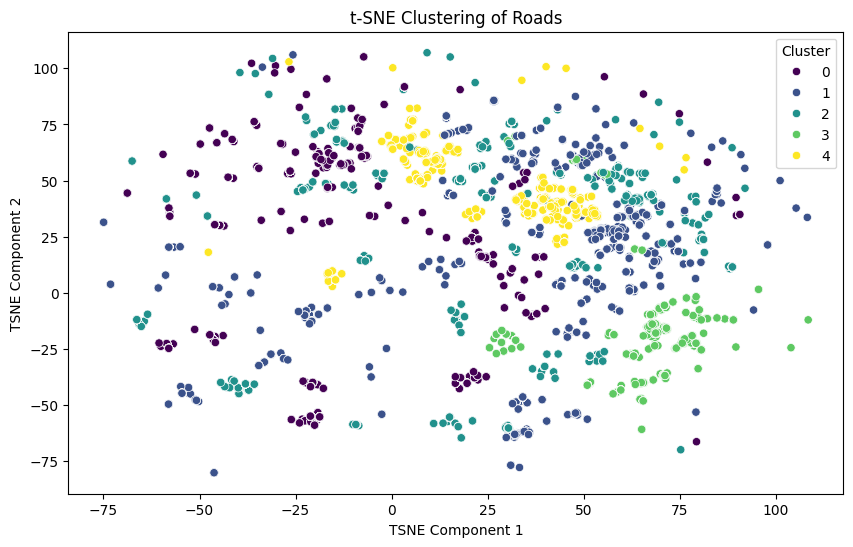

In [6]:
from sklearn.manifold import TSNE

# Initialize t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)

df_scaled = df_pre[['Route Type', 'Road Grade', 'Number of Lanes', 'Road Alignment', 'Road Condition']]

# Fit and transform the data
tsne_data = tsne.fit_transform(df_scaled)

# Create a DataFrame for visualization
df_tsne = pd.DataFrame(tsne_data, columns=['TSNE1', 'TSNE2'])
df_tsne['Cluster'] = df_cluster['Cluster']

# Visualize the clusters using t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df_tsne, palette='viridis')
plt.title('t-SNE Clustering of Roads')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster')
plt.show()


In [7]:
import plotly.express as px

# Plot t-SNE clusters using Plotly
fig = px.scatter(df_tsne, x='TSNE1', y='TSNE2', color='Cluster',
                 title='t-SNE Clustering of Roads', labels={'TSNE1': 'TSNE Component 1', 'TSNE2': 'TSNE Component 2'},
                 color_continuous_scale='viridis')

fig.update_layout(legend_title='Cluster')
fig.show()